In [248]:
from urllib import request, error
#import a module with classes and functions which help opening URL's
from bs4 import BeautifulSoup as bs
#A library that makes webscraping easier

site1 = "https://worldpopulationreview.com/country-rankings/crime-rate-by-country"

response = bs(request.urlopen(site1),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("Crime.csv", "w") as file:
    file.write("..,Country,Crime index,Safety index")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

In [250]:
import pandas as pd

Crimedf = pd.read_csv("Crime.csv")
Crimedf.drop(columns=["..", "Safety index"], axis=1, inplace=True)
pd.to_numeric(Crimedf["Crime index"], errors="coerce")
Crimedf


,Country,Crime index
0,Venezuela,81.2
1,Papua New Guinea,79.7
2,Afghanistan,78.3
3,Haiti,77.9
4,South Africa,75.4
...,...,...
136,Oman,19.0
137,Taiwan,16.7
138,Qatar,16.0
139,United Arab Emirates,15.6


In [141]:
site2 = "https://worldpopulationreview.com/country-rankings/gini-coefficient-by-country"

response = bs(request.urlopen(site2),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("Gini.csv", "w") as file:
    file.write("..,Country,Gini Coefficient,1,2,3")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

In [142]:
Ginidf = pd.read_csv("Gini.csv")
Ginidf.drop(columns=["..", "1", "2", "3"], axis=1, inplace=True)
Ginidf["Gini Coefficient"]=Ginidf["Gini Coefficient"].str.replace("%", '')
Ginidf["Gini Coefficient"]= pd.to_numeric(Ginidf["Gini Coefficient"], errors="coerce")
Ginidf


,Country,Gini Coefficient
0,South Africa,63.0
1,Namibia,59.1
2,Colombia,54.8
3,Eswatini,54.6
4,Botswana,53.3
...,...,...
229,Montserrat,NaN
230,Falkland Islands,NaN
231,Tokelau,NaN
232,Niue,NaN


In [145]:
site3 = "https://worldpopulationreview.com/country-rankings/hdi-by-country"

response = bs(request.urlopen(site3),"html.parser")
TAB = response.find("table", class_="wpr-table min-w-full border-collapse")

rows = TAB.find_all("tr")

with open("HDI.csv", "w") as file:
    file.write("..,Country,HDI tier,HDI")
    for row in rows:
        cells = row.find_all("td")
        row_contents = []
        for cell in cells:
            row_contents.append(cell.text.strip())
        file.write(",".join(row_contents) + "\n")

In [146]:
HDIdf = pd.read_csv("HDI.csv")
HDIdf.drop(columns=["..", "HDI tier"], axis=1, inplace=True)
HDIdf

,Country,HDI
0,United States,0.927
1,Russia,0.821
2,Japan,0.920
3,Turkey,0.855
4,Germany,0.950
...,...,...
188,Saint Vincent and the Grenadines,0.772
189,Dominica,0.740
190,Marshall Islands,0.731
191,Palau,0.797


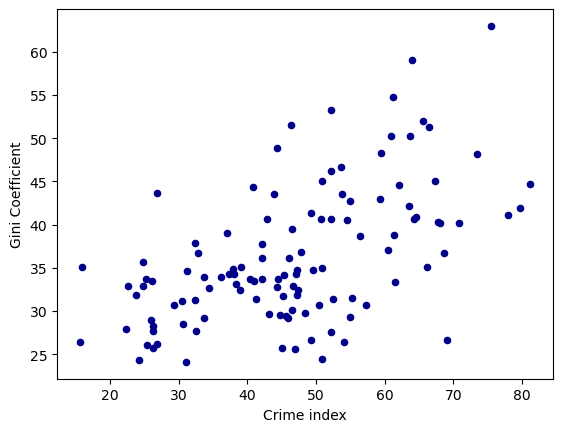

In [149]:
crimevsgini = pd.merge(Crimedf, Ginidf, on="Country",how="inner")
crimevsgini
scatter1 = crimevsgini.plot.scatter(x="Crime index", y="Gini Coefficient", c='DarkBlue')

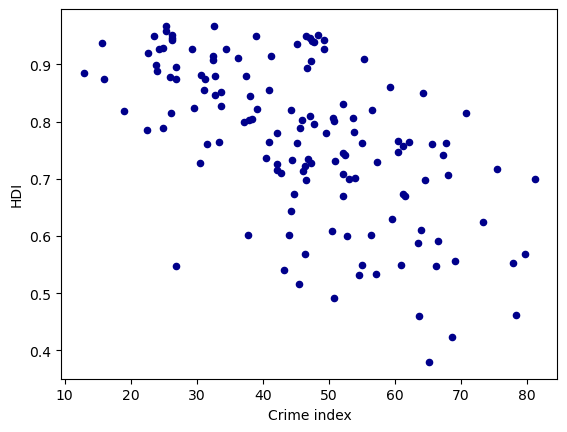

In [151]:
crimevsgini = pd.merge(Crimedf, HDIdf, on="Country")
crimevsgini
scatter2 = crimevsgini.plot.scatter(x="Crime index", y="HDI", c='DarkBlue')

In [300]:
import urllib.request
import shutil
import os
urllib.request.urlretrieve("https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=csv", "GiniUK.zip")
shutil.unpack_archive("GiniUK.zip")
os.rename("API_SI.POV.GINI_DS2_en_csv_v2_19376.csv", "GiniUK.csv")



,Country Name,Year,Gini
81,United Kingdom,1960.0,NaN
347,United Kingdom,1961.0,NaN
613,United Kingdom,1962.0,NaN
879,United Kingdom,1963.0,NaN
1145,United Kingdom,1964.0,NaN
...,...,...,...
16307,United Kingdom,2021.0,32.4
16573,United Kingdom,2022.0,NaN
16839,United Kingdom,2023.0,NaN
17105,United Kingdom,2024.0,NaN


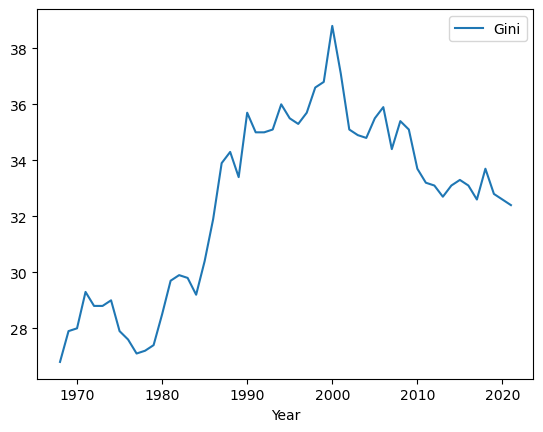

In [314]:
GiniUKdf = pd.read_csv("GiniUK.csv", header=2)
GiniUKdf = GiniUKdf.drop(columns=["Country Code", "Indicator Name", "Indicator Code"])
GiniUKdf = pd.melt(GiniUKdf, id_vars=["Country Name"], var_name="Year", value_name="Gini")
GiniUKdf = GiniUKdf[GiniUKdf["Country Name"] == "United Kingdom"]
GiniUKdf[["Gini", "Year"]] = GiniUKdf[["Gini", "Year"]].apply(lambda col: pd.to_numeric(col, errors="coerce"))
lines = GiniUKdf.plot.line(x="Year", y="Gini")
GiniUKdf

  Using cached chromedriver-2.24.1-py2.py3-none-any.whl.metadata (304 bytes)
Using cached chromedriver-2.24.1-py2.py3-none-any.whl (14.3 MB)


In [272]:
import urllib.request

url = "https://www.ons.gov.uk/generator?uri=/peoplepopulationandcommunity/crimeandjustice/bulletins/crimeinenglandandwales/yearendingseptember2024/6580d8c7&format=csv"
filename = "CrimeUK.csv"

req = urllib.request.Request(
    url,
    headers={'User-Agent': 'Mozilla/5.0'}
)

with urllib.request.urlopen(req) as response:
    with open(filename, 'wb') as out_file:
        out_file.write(response.read())

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ronni\AppData\Local\Temp\ipykernel_10964\628237369.py:5: SyntaxWarning: invalid escape sequence '\d'
  CrimeUKdf["Year"] = CrimeUKdf["Year"].str.extract('(\d+)', expand=False)


,Year,Crime
0,1981,11303.0
1,1982,NaN
2,1983,12128.0
3,1984,NaN
4,1985,NaN
5,1986,NaN
6,1987,13647.0
7,1988,NaN
8,1989,NaN
9,1990,NaN


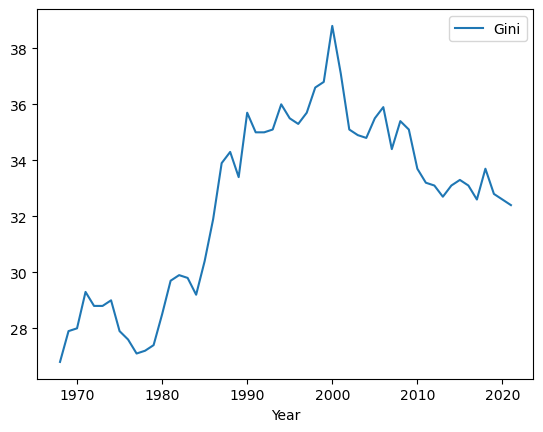

In [428]:
CrimeUKdf = pd.read_csv("CrimeUK.csv", header = 6)
CrimeUKdf
CrimeUKdf.drop(columns=["CSEW estimate including fraud and computer misuse", "CSEW headline estimates excluding fraud and computer misuse - YE September ", "CSEW headline estimates including fraud and computer misuse - YE September"], axis=1, inplace=True)
CrimeUKdf.rename(columns={"CSEW estimates excluding fraud and computer misuse": "Crime", "Unnamed: 0": "Year"}, inplace=True)
CrimeUKdf["Year"] = CrimeUKdf["Year"].str.extract('(\d+)', expand=False)
pd.to_numeric(CrimeUKdf["Year"], errors="coerce")
pd.to_numeric(CrimeUKdf["Crime"], errors="coerce")
lines = GiniUKdf.plot.line(x="Year", y="Gini")
CrimeUKdf
